In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
data = pd.read_csv('housing data (1).csv',na_values='?')

In [222]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In [224]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


In [225]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [226]:
# Lets explore the correlation among the number columns in the data using heatmap

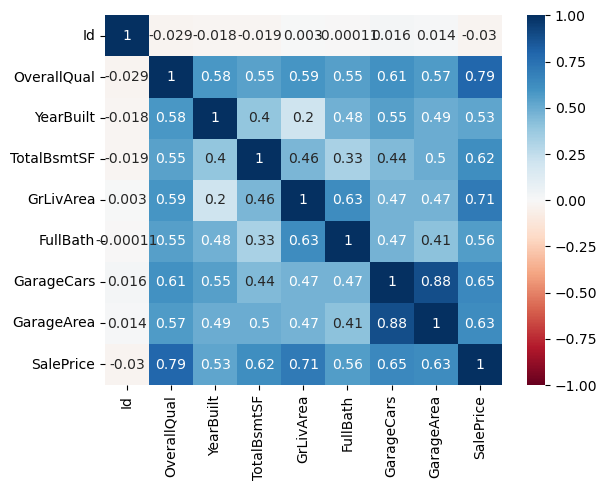

In [227]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

In [228]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

### UNIVARIATE ANALYSIS

In [229]:
data.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical',
       'GrLivArea', 'FullBath', 'GarageType', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature', 'SalePrice'],
      dtype='object')

In [230]:
num_cols = ['YearBuilt', 'TotalBsmtSF','GrLivArea', 'GarageArea','SalePrice']

In [231]:
cat_cols = ['OverallQual', 'Electrical','FullBath', 'GarageType', 'GarageCars','Fence', 'MiscFeature']

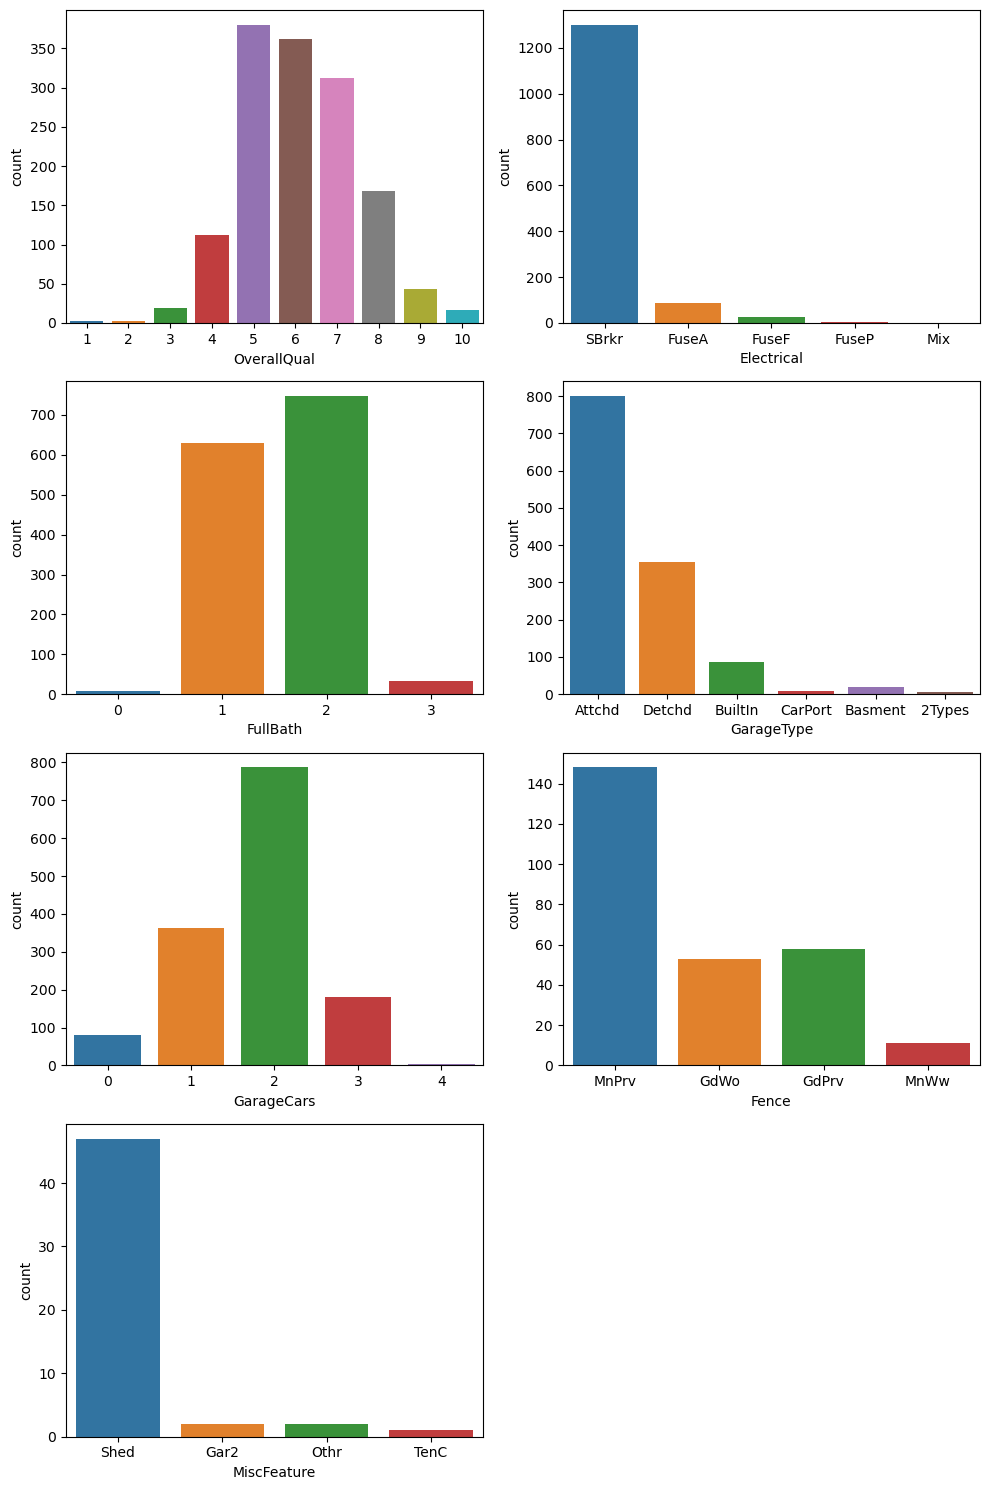

In [232]:
t = 1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

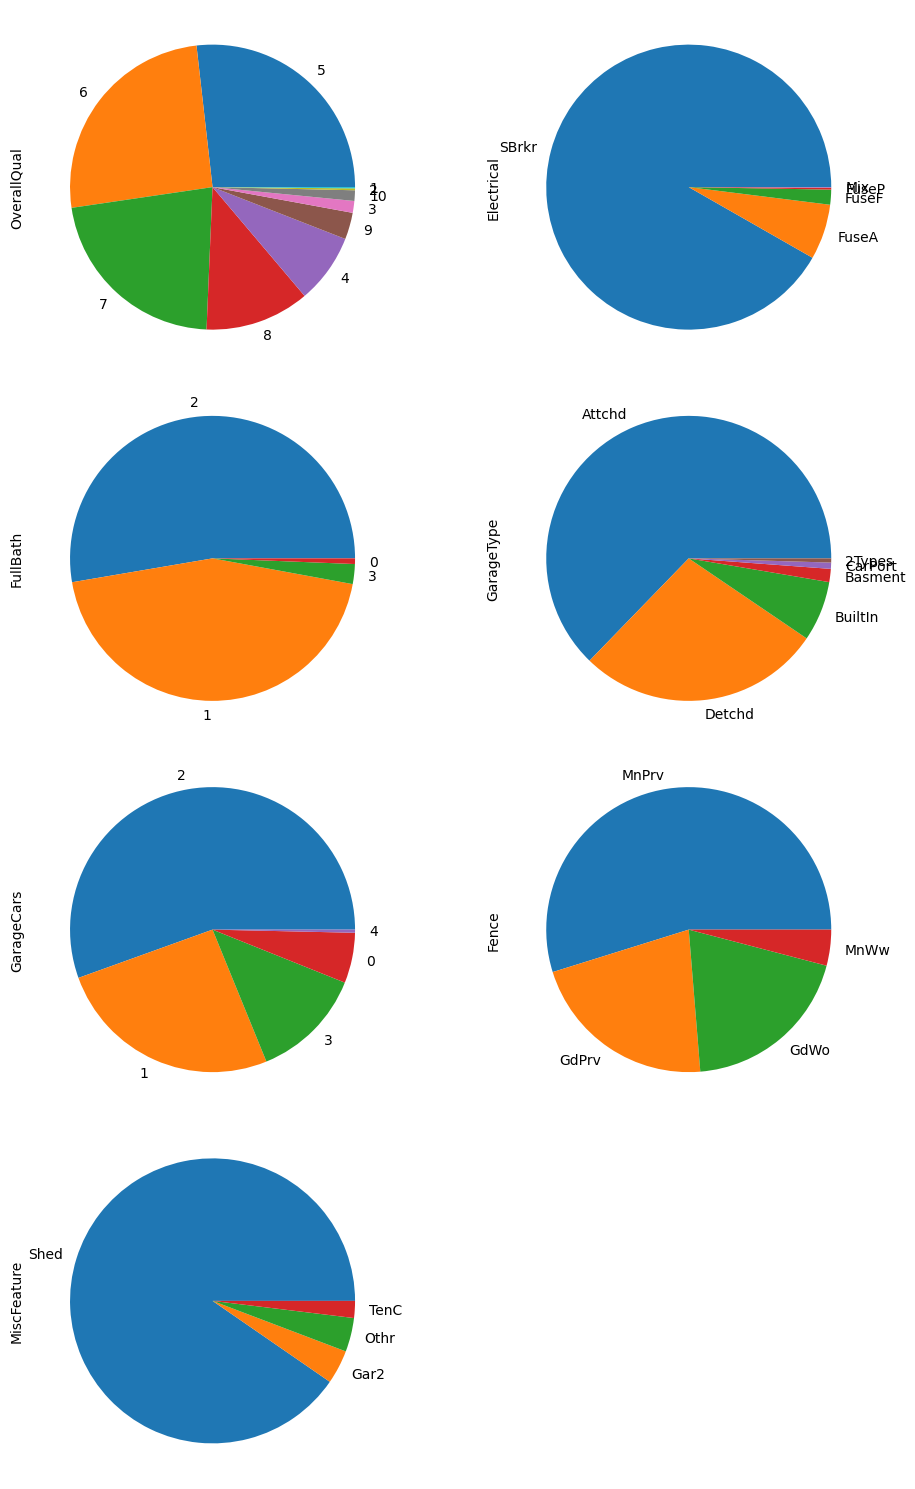

In [233]:
t = 1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    #plt.pie(data[i].value_counts())
    data[i].value_counts().plot(kind='pie')
    t+=1
plt.tight_layout()
plt.show()

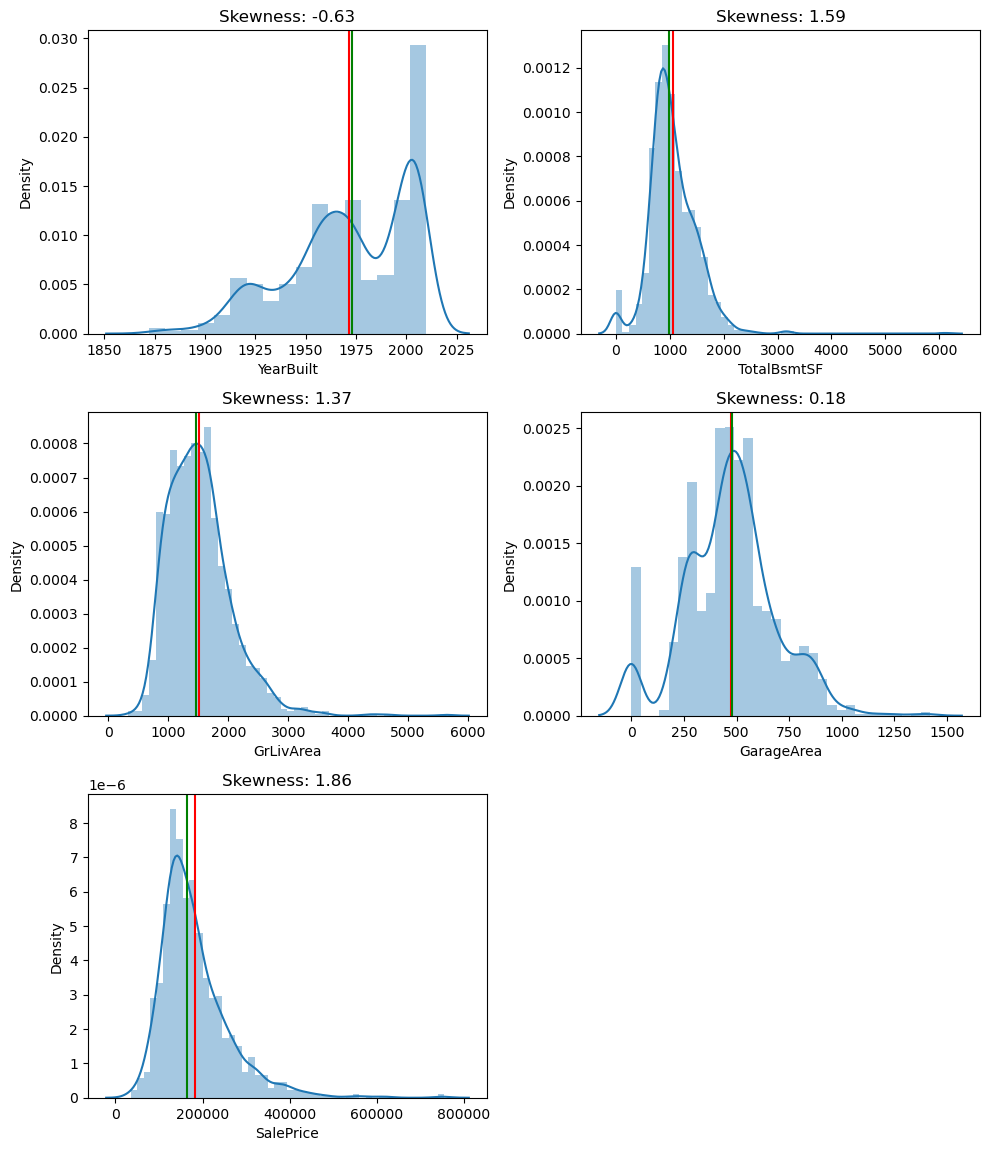

In [234]:
t = 1
plt.figure(figsize=(10,15))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    plt.title('Skewness: %.2f'%data[i].skew())
    
    t+=1
plt.tight_layout()
plt.show()

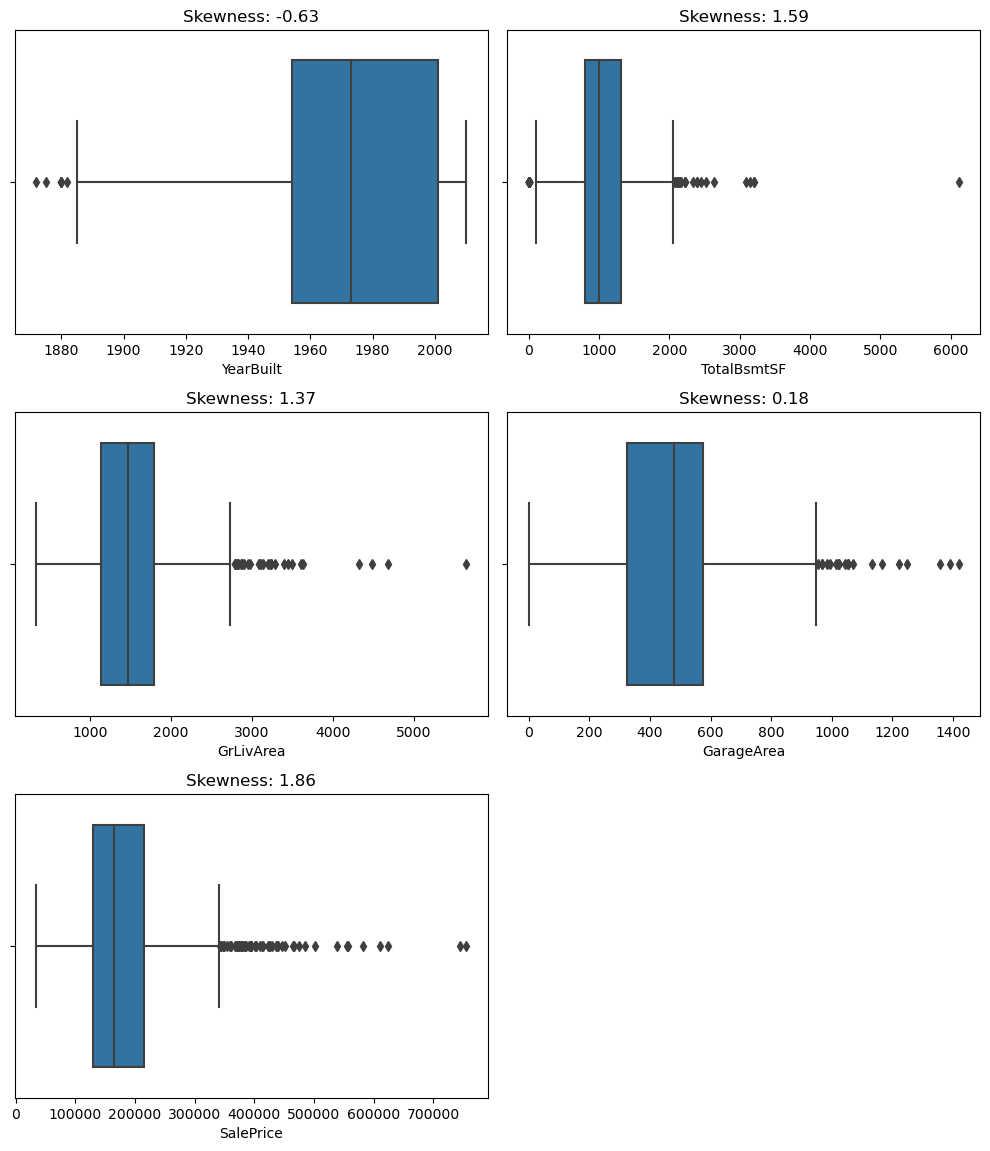

In [235]:
t = 1
plt.figure(figsize=(10,15))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    plt.title('Skewness: %.2f'%data[i].skew())
    t+=1
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS

In [236]:
# Category VS Number (Target)

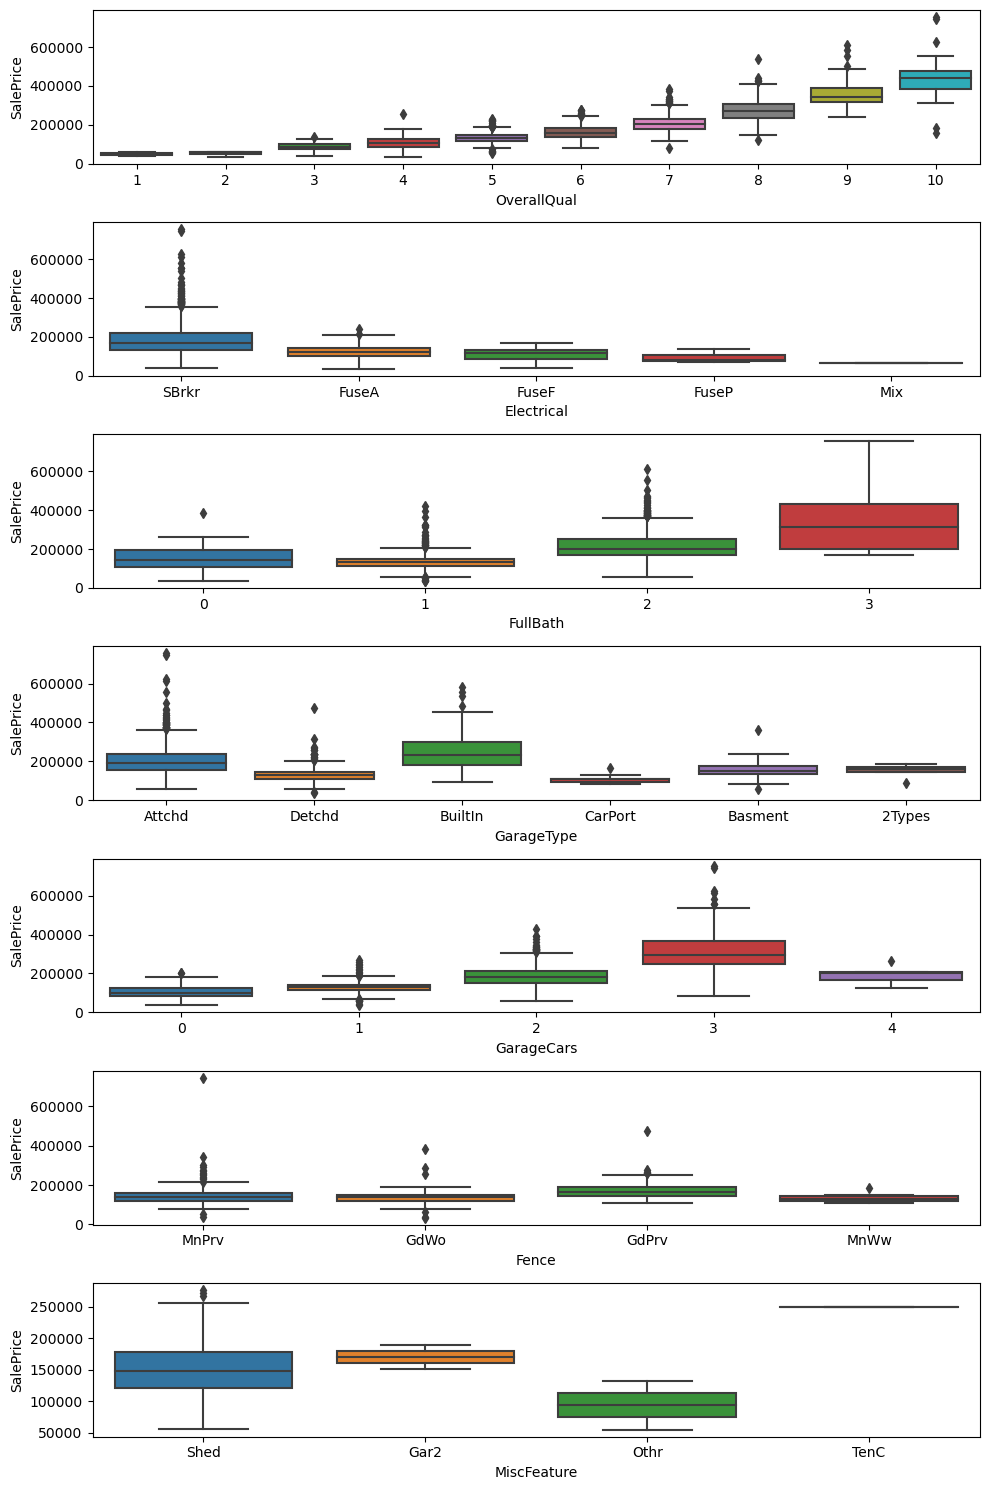

In [237]:
t = 1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(7,1,t)
    sns.boxplot(x=data[i],y=data['SalePrice'])
    t+=1
plt.tight_layout()
plt.show()

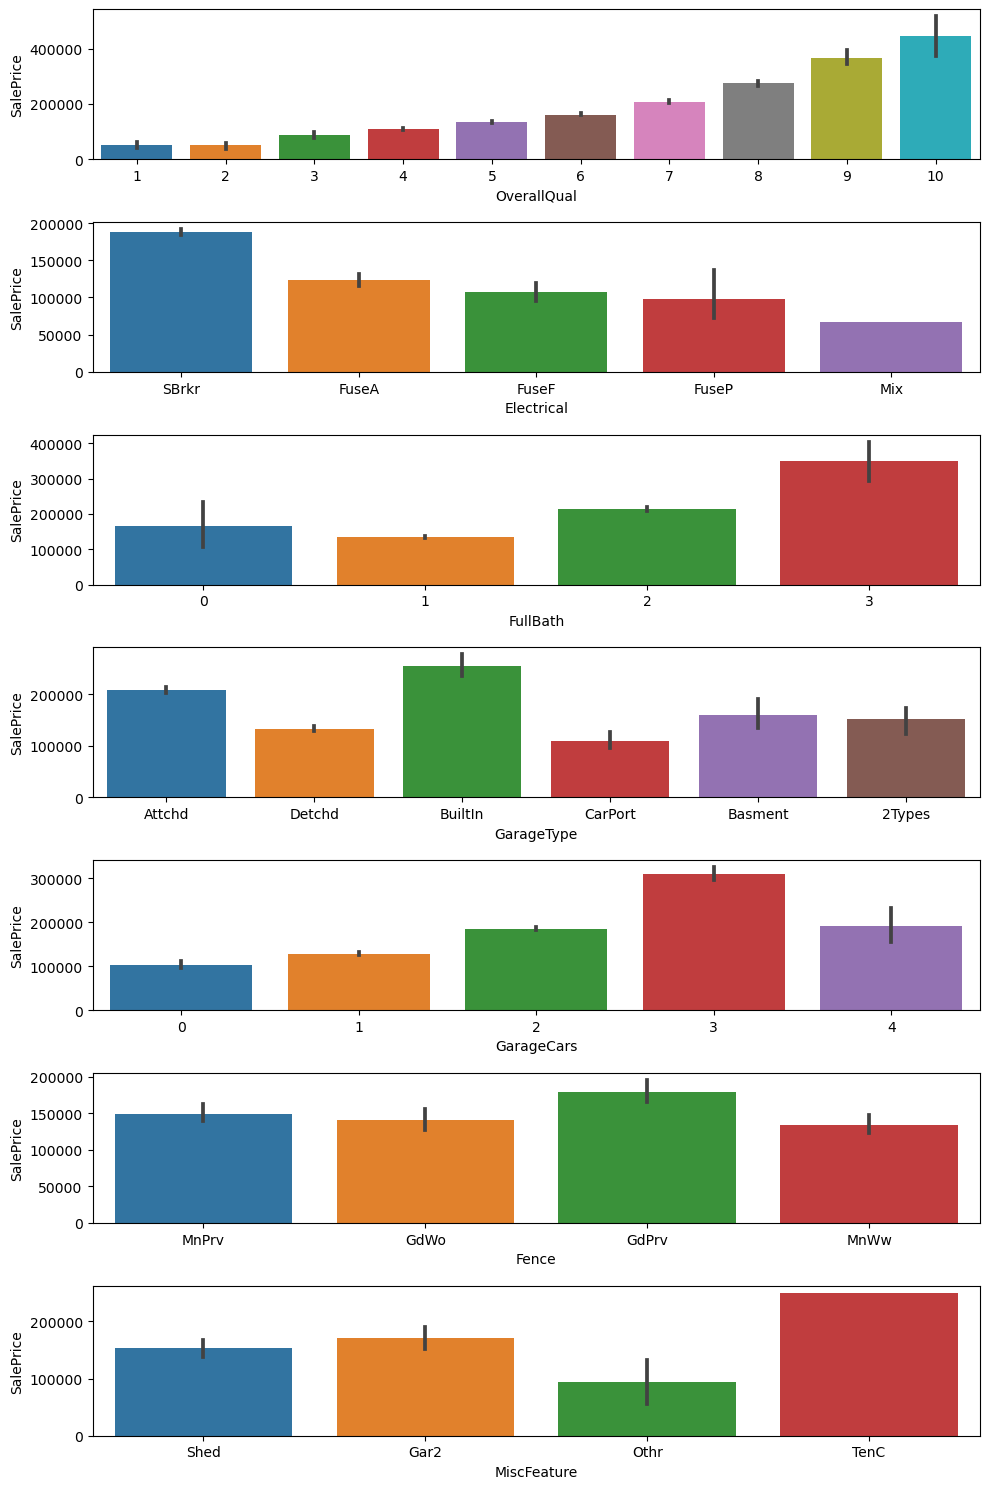

In [238]:
t = 1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(7,1,t)
    sns.barplot(x=data[i],y=data['SalePrice'])
    t+=1
plt.tight_layout()
plt.show()

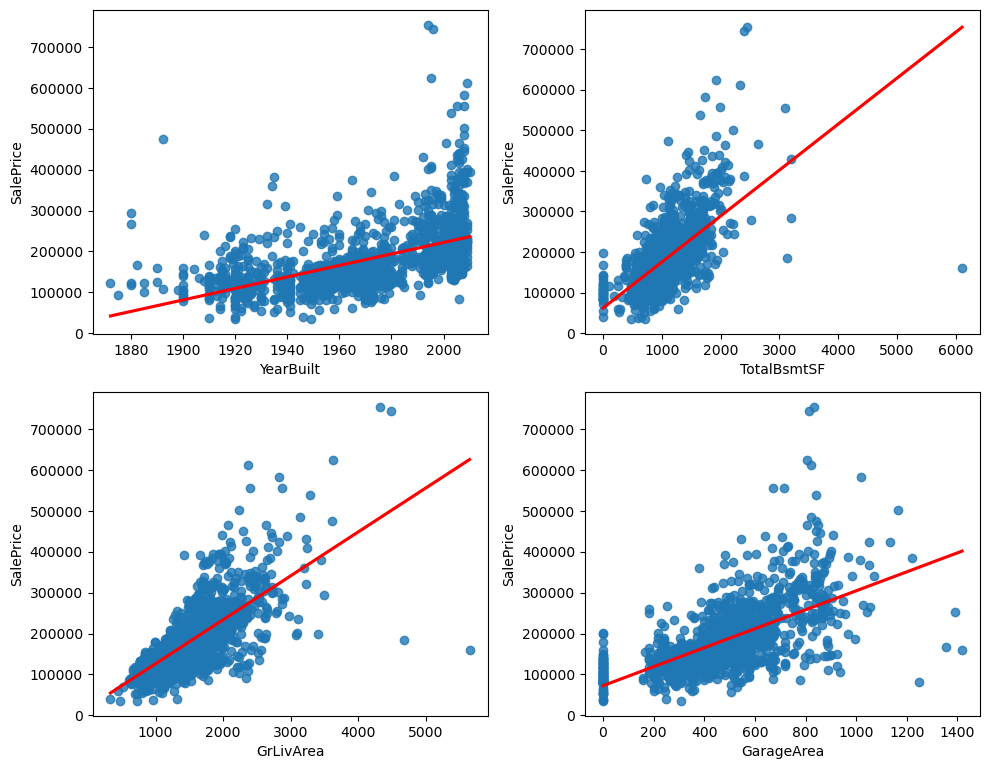

In [239]:
t = 1
plt.figure(figsize=(10,15))
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(4,2,t)
        sns.regplot(x=data[i],y=data['SalePrice'],line_kws={'color':'red'},ci=0)
        t+=1
plt.tight_layout()
plt.show()

### MISSING VALUE TREATMENT

In [240]:
(data.isnull().sum().sort_values(ascending=False)/data.shape[0])*100

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [241]:
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)

In [242]:
data['MiscFeature'].value_counts()

0    1366
1      52
Name: MiscFeature, dtype: int64

In [243]:
data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [244]:
# treating missing value in Electrical
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [245]:
data['Electrical'].mode()[0]

'SBrkr'

In [246]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,0,0,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,1,0,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,0,0,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,0,0,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,0,0,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,1,0,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,0,0,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,0,0,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,0,0,84500


In [247]:
data['GarageType']= np.where(data['GarageArea']==0,'NoGarage',data['GarageType'])

In [248]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,0,0,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,1,0,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,0,0,207500
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,0,0,170000
47,48,5,1966,955,SBrkr,955,1,NaN,1,386,1,0,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1264,6,1942,771,SBrkr,1494,1,NaN,1,213,0,0,177500
1317,1318,5,1966,864,SBrkr,892,1,NaN,1,264,1,0,110000
1357,1358,5,1950,1208,FuseA,1904,1,NaN,1,240,1,0,138000
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,1,0,119000


In [249]:
data[data['GarageCars']==1]['GarageType'].value_counts()

Detchd     178
Attchd     105
BuiltIn      8
Basment      8
CarPort      3
Name: GarageType, dtype: int64

In [250]:
data['GarageType']= np.where(data['GarageCars']==1,'Detchd',data['GarageType'])

In [251]:
data.GarageType.value_counts()

Attchd      695
Detchd      540
NoGarage     81
BuiltIn      79
Basment      11
CarPort       6
2Types        6
Name: GarageType, dtype: int64

### OUTLIER TREATMENT

In [252]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,0,0,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,0,0,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,0,0,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,0,0,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,0,0,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,1,0,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Detchd,1,252,1,1,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,0,0,142125


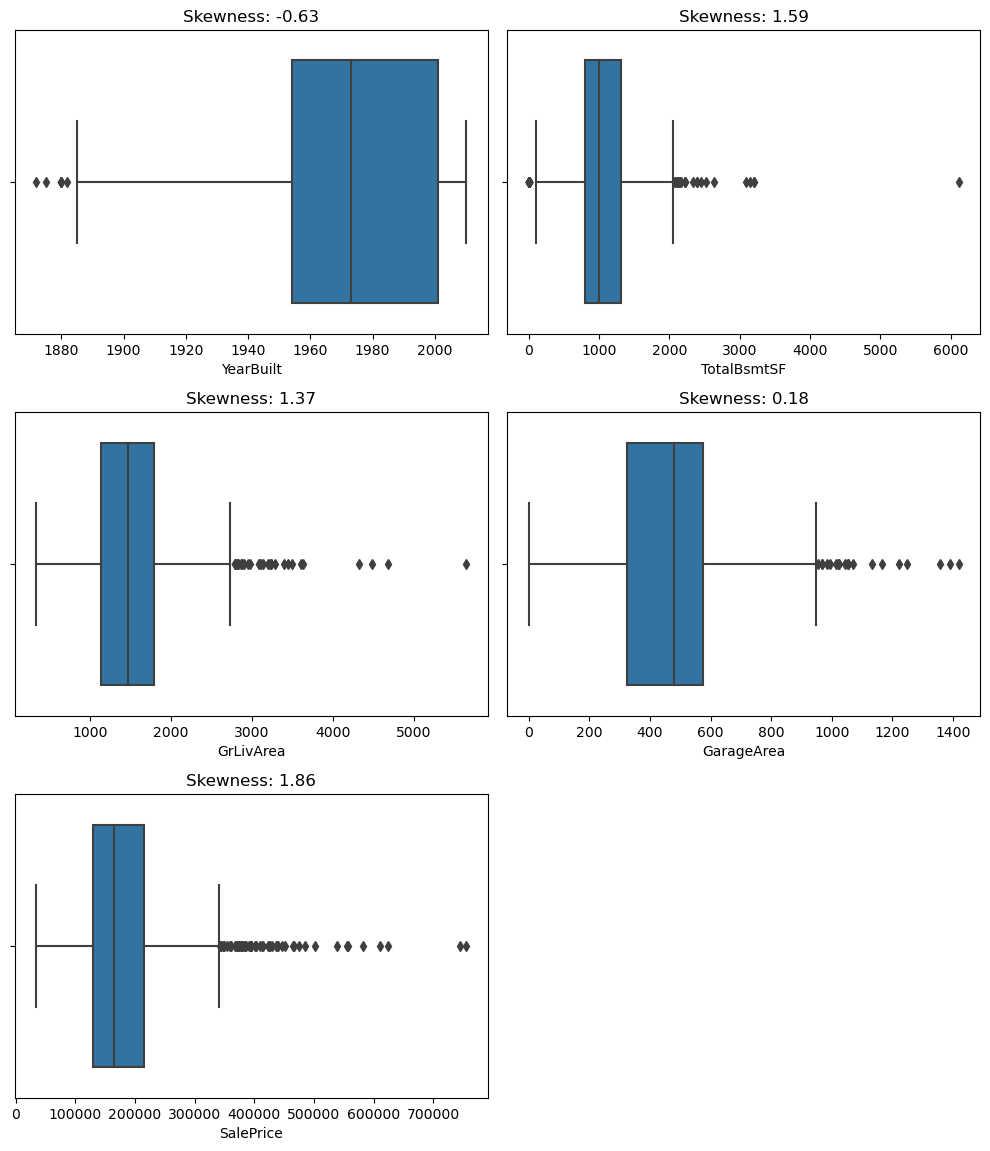

In [253]:
t = 1
plt.figure(figsize=(10,15))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    plt.title('Skewness: %.2f'%data[i].skew())
    t+=1
plt.tight_layout()
plt.show()

In [254]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [255]:
lamb = []
for i in num_cols:
    if i!= 'SalePrice':
        data[i]= pt.fit_transform(pd.DataFrame(data[i]))
        lamb.append(pt.lambdas_)

In [256]:
lamb

[array([22.52241122]),
 array([0.73357074]),
 array([0.01426188]),
 array([0.80501806])]

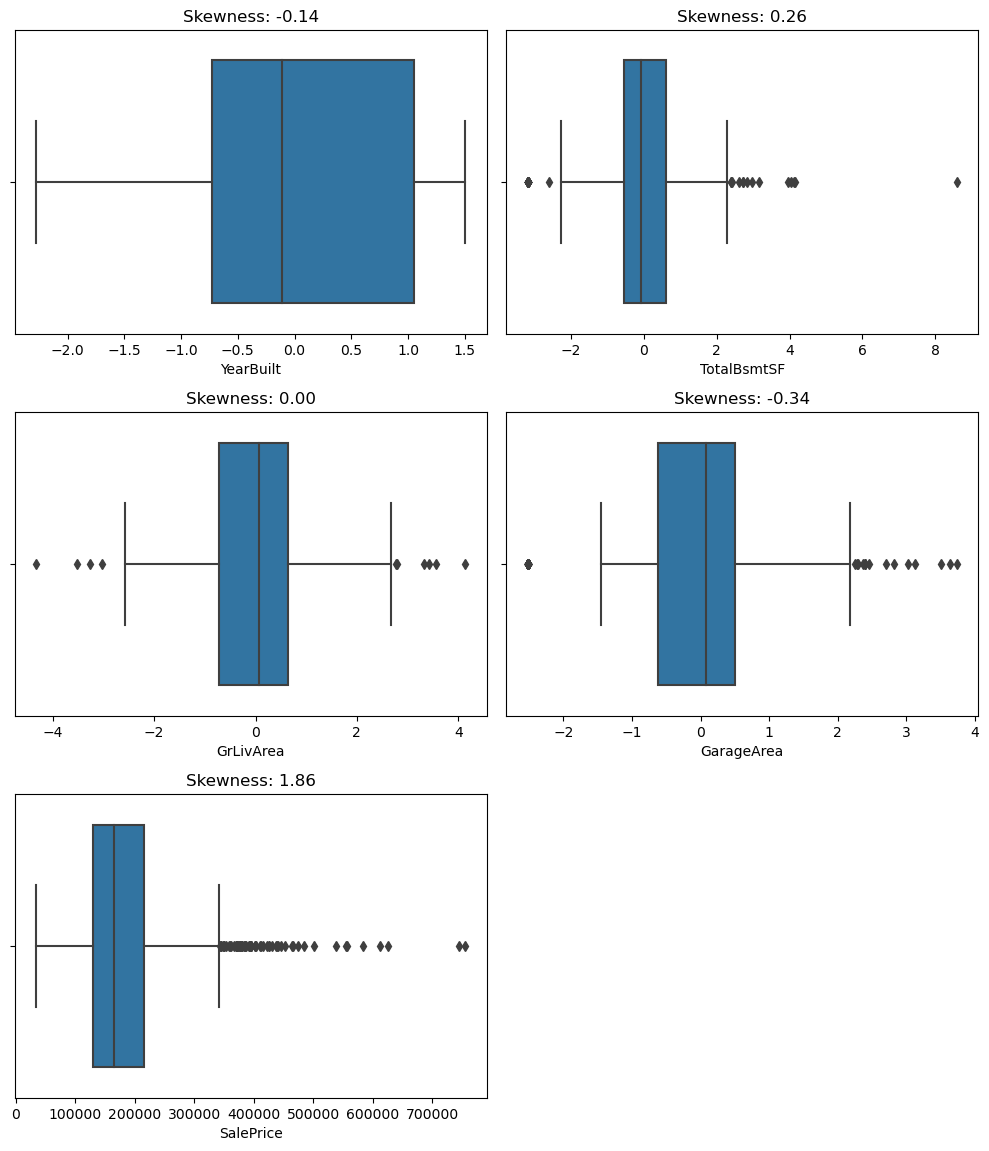

In [257]:
t = 1
plt.figure(figsize=(10,15))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    plt.title('Skewness: %.2f'%data[i].skew())
    t+=1
plt.tight_layout()
plt.show()

In [259]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,1.145687,-0.416995,SBrkr,0.518720,2,Attchd,2,0.383575,0,0,208500
1,2,6,-0.006688,0.501847,SBrkr,-0.391108,2,Attchd,2,0.000269,0,0,181500
2,3,7,1.048342,-0.265508,SBrkr,0.649289,2,Attchd,2,0.637996,0,0,223500
3,4,7,-1.639625,-0.659911,SBrkr,0.530983,1,Detchd,3,0.779979,0,0,140000
4,5,8,1.000448,0.246422,SBrkr,1.273700,2,Attchd,3,1.564622,0,0,250000


In [261]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,7.095000e+02,409.485653,1.000000,355.250000,709.500000,1063.750000,1418.000000
OverallQual,1418.0,6.114245e+00,1.385858,1.000000,5.000000,6.000000,7.000000,10.000000
YearBuilt,1418.0,-2.743848e-16,1.000353,-2.276865,-0.725180,-0.115130,1.048342,1.503327
TotalBsmtSF,1418.0,2.691390e-16,1.000353,-3.189486,-0.560558,-0.093803,0.590911,8.587961
GrLivArea,1418.0,1.340841e-15,1.000353,-4.322435,-0.714364,0.062229,0.649289,4.133476
FullBath,1418.0,1.565585e+00,0.551127,0.000000,1.000000,2.000000,2.000000,3.000000
GarageCars,1418.0,1.763752e+00,0.755995,0.000000,1.000000,2.000000,2.000000,4.000000
GarageArea,1418.0,2.885171e-16,1.000353,-2.519861,-0.621156,0.079756,0.502946,3.737091
Fence,1418.0,1.904090e-01,0.392762,0.000000,0.000000,0.000000,0.000000,1.000000
MiscFeature,1418.0,3.667137e-02,0.188020,0.000000,0.000000,0.000000,0.000000,1.000000


### ENCODING (Treating Catergorical Columns)

In [262]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,1.145687,-0.416995,SBrkr,0.518720,2,Attchd,2,0.383575,0,0,208500
1,2,6,-0.006688,0.501847,SBrkr,-0.391108,2,Attchd,2,0.000269,0,0,181500
2,3,7,1.048342,-0.265508,SBrkr,0.649289,2,Attchd,2,0.637996,0,0,223500
3,4,7,-1.639625,-0.659911,SBrkr,0.530983,1,Detchd,3,0.779979,0,0,140000
4,5,8,1.000448,0.246422,SBrkr,1.273700,2,Attchd,3,1.564622,0,0,250000


In [263]:
data['Electrical'].value_counts()

SBrkr    1301
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [264]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)

In [265]:
data['Electrical'].value_counts()

1    1301
0     117
Name: Electrical, dtype: int64

In [266]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,1.145687,-0.416995,1,0.518720,2,Attchd,2,0.383575,0,0,208500
1,2,6,-0.006688,0.501847,1,-0.391108,2,Attchd,2,0.000269,0,0,181500
2,3,7,1.048342,-0.265508,1,0.649289,2,Attchd,2,0.637996,0,0,223500
3,4,7,-1.639625,-0.659911,1,0.530983,1,Detchd,3,0.779979,0,0,140000
4,5,8,1.000448,0.246422,1,1.273700,2,Attchd,3,1.564622,0,0,250000


In [267]:
data['GarageType'].value_counts().to_dict()

Attchd      695
Detchd      540
NoGarage     81
BuiltIn      79
Basment      11
CarPort       6
2Types        6
Name: GarageType, dtype: int64